# **EV Charging Consumption Analysis & Forecasting - TGSPDCL**

## **Meta Data**

- **Organisation: The Telangana Southern Power Distribution Company of Limited (TGSPDCL)**
- **Data available from June 2021 to October 2025**
- This dataset provides information about the Domestic consumption details in the Southern part of Telangana.
- Contains the below columns: | circle | division | subdivision | section | area | catdesc | catcode | totservices | billdservices | units | load |


**Abbreviation:**
- Circle, Division, Subdivision, Section, and Area will help to identify location (TGSPDCL uses Circle as districts).
- catdesc: Category Description (Type of Connection)
- catcode: Category Code (Code for connection Type)
- totservices: Total Services (Number of Connection during the month)
- billdservices: Billed Services (Number of Connection billed during the month)
- Units: It will give details of units billed in a month
- Load: It will give details of load billed in a month


**Note:**
- The load can be identified based on the category (cat code)
- 1,2,7,8,9 are referred with kW 
- 3,4,5 are referred with hp
- 6 consists of street light services which are referred with kW & PWS connections are referred with hp

## **Data Preparing**

##### **Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')



##### **Load Data**

In [2]:
## Load All Datasets at a time using For loop

mnt = 6  ##we know month our datset starts
yr = 2021  ##we now year alsi
months_to_load = 54  ##no.of months 
dfs = []  ##intilizing list to store all dataframes

## for loop to load all and add new columns to it
for i in range(months_to_load):
    fname = f'Data/ev_charging_{mnt}_{yr}.csv' ##file name

    ##Exception handling if we encounter error
    try:
        df = pd.read_csv(fname,  low_memory=False) ##Load data
        df['Year'] = yr ##Create new_column Year
        df['Month'] = mnt ##Create new column Month
        df['source_file'] = fname ##add column to add file source
        dfs.append(df) ##append all datafrmes
        print("Loaded", fname) 
    except:
        print('This month dataset does not exist !!')
    
    ## Move month and year
    if mnt == 12:
        mnt = 1
        yr += 1
    else:
        mnt += 1

Loaded Data/ev_charging_6_2021.csv
Loaded Data/ev_charging_7_2021.csv
Loaded Data/ev_charging_8_2021.csv
Loaded Data/ev_charging_9_2021.csv
Loaded Data/ev_charging_10_2021.csv
Loaded Data/ev_charging_11_2021.csv
Loaded Data/ev_charging_12_2021.csv
Loaded Data/ev_charging_1_2022.csv
Loaded Data/ev_charging_2_2022.csv
Loaded Data/ev_charging_3_2022.csv
Loaded Data/ev_charging_4_2022.csv
This month dataset does not exist !!
Loaded Data/ev_charging_6_2022.csv
Loaded Data/ev_charging_7_2022.csv
Loaded Data/ev_charging_8_2022.csv
Loaded Data/ev_charging_9_2022.csv
Loaded Data/ev_charging_10_2022.csv
Loaded Data/ev_charging_11_2022.csv
Loaded Data/ev_charging_12_2022.csv
Loaded Data/ev_charging_1_2023.csv
Loaded Data/ev_charging_2_2023.csv
Loaded Data/ev_charging_3_2023.csv
Loaded Data/ev_charging_4_2023.csv
Loaded Data/ev_charging_5_2023.csv
Loaded Data/ev_charging_6_2023.csv
Loaded Data/ev_charging_7_2023.csv
Loaded Data/ev_charging_8_2023.csv
Loaded Data/ev_charging_9_2023.csv
Loaded Data/

##### **Concat dataframes**

In [3]:
##Concatenate all datsets to form One datset
data = pd.concat(dfs, ignore_index=True)
print("Combined rows: ", len(data))

data.head()

Combined rows:  9094


,circle,division,subdivision,section,area,catdesc,catcode,totservices,billdservices,units,load,Year,Month,source_file
0,BANJARA HILLS,GREEN LANDS,GREENLANDS,BEGUMPET,GRC. SHYAMLAL,EV CHARGING STATIONS,9,1,1.0,101.0,22.0,2021,6,Data/ev_charging_6_2021.csv
1,BANJARA HILLS,BANJARA HILLS,AMEERPET,YOUSUFGUDA,PRAGATHINAGAR-1,EV CHARGING STATIONS,9,1,1.0,34.0,8.0,2021,6,Data/ev_charging_6_2021.csv
2,BANJARA HILLS,BANJARA HILLS,JUBILEE HILLS,JUBILEE HILLS,GRC HIGH VALUES,EV CHARGING STATIONS,9,2,2.0,539.0,65.0,2021,6,Data/ev_charging_6_2021.csv
3,CYBERCITY,KONDAPUR,KONDAPUR,ALLAPUR,SOCIETY HV2,EV CHARGING STATIONS,9,1,1.0,6.0,15.0,2021,6,Data/ev_charging_6_2021.csv
4,HABSIGUDA,HABSIGUDA,HABSIGUDA,NACHARAM,NACHARAM,EV CHARGING STATIONS,9,1,1.0,3.0,15.0,2021,6,Data/ev_charging_6_2021.csv


In [4]:
##Save Dataframe as CSV

#data.to_csv(r'c:\Users\ghant\OneDrive\Desktop\Project\Data\ev_charging_combined.csv', index=False)

##### **Knowing Data**

In [5]:
##Shape of the data
print("Shape of The dataset: ",data.shape)

Shape of The dataset:  (9094, 14)


In [6]:
##Columns
print("Columns in our data: ", list(data.columns) )

Columns in our data:  ['circle', 'division', 'subdivision', 'section', 'area', 'catdesc', 'catcode', 'totservices', 'billdservices', 'units', 'load', 'Year', 'Month', 'source_file']


In [7]:
##Data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   circle         9094 non-null   object 
 1   division       9094 non-null   object 
 2   subdivision    9094 non-null   object 
 3   section        9094 non-null   object 
 4   area           9094 non-null   object 
 5   catdesc        9094 non-null   object 
 6   catcode        9094 non-null   int64  
 7   totservices    9094 non-null   int64  
 8   billdservices  8665 non-null   float64
 9   units          9094 non-null   float64
 10  load           9094 non-null   float64
 11  Year           9094 non-null   int64  
 12  Month          9094 non-null   int64  
 13  source_file    9094 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 994.8+ KB


##### **Insights from above**

- Data consists of 9094 rows and 14 columns.
- It consisits on both Categorical and Continous columns.
- From info we can find some null values in 'billdservices' column that we are going to handle furthur.
- I find some of the columns datatypes are not correct we will  handle it further.


##### **Understanding Variables**

- **circle**: Helps identify the district where the consumption happened.
- **division**: Each circle(district) is divided into several divisions.
- **subdivision**: Each division contains multiple subdivisions. This is where feild engineers moniter readings.
- **section**: Sections are the smallest administrative unit inside a subdivision.
- **arear**: This is the Locality name of the inside a section.
- **catdesc**: category description - type of connection example Domestic, Commercial, EV charging.since, it is EV charging so it is same description for every row
- **catcode**: category code - It is numeric code for type of connection.It tells Laod types since, our connection is evcharging it is 9 for all rows and load measured units are KW.
- **totservices**: Total number of active electricity connections in that month for that category & area.
- **billdservices**: Billed Services - Number of connections actually billed during that month.
- **units**: Units Billed - Total electricity units consumed by that category in that area for the month.
- **load**: Connected Load Billed - Total sanctioned load billed for that category.
- **year**: year it recorded.
- **month**: month it recorded.

In [8]:
##Basic stats about continous variables
data.describe()

,catcode,totservices,billdservices,units,load,Year,Month
count,9094.0,9094.000000,8665.000000,9094.000000,9094.000000,9094.000000,9094.000000
mean,9.0,1.204970,1.194807,1615.511656,40.785863,2024.011656,6.630965
std,0.0,0.539635,0.521377,3143.370343,35.667906,1.073908,3.219174
min,9.0,1.000000,1.000000,-1740.000000,1.000000,2021.000000,1.000000
25%,9.0,1.000000,1.000000,7.250000,15.000000,2023.000000,4.000000
50%,9.0,1.000000,1.000000,335.000000,30.000000,2024.000000,7.000000
75%,9.0,1.000000,1.000000,2003.000000,54.000000,2025.000000,9.000000
max,9.0,6.000000,6.000000,43562.000000,336.000000,2025.000000,12.000000


In [9]:
##Basic stats about categorical variable
data.describe(include='object')

,circle,division,subdivision,section,area,catdesc,source_file
count,9094,9094,9094,9094,9094,9094,9094
unique,20,47,111,241,503,1,52
top,HABSIGUDA,SAROORNAGAR,L B NAGAR,L.B.NAGAR,GRC,EV CHARGING STATIONS,Data/ev_charging_8_2025.csv
freq,1145,619,351,195,93,9094,495


In [10]:
###Lets see how many  circles are there in our data
print("circles: ",list(data['circle'].unique()))
print("No. of Circles:", len(list(data['circle'].unique())))



circles:  ['BANJARA HILLS', 'CYBERCITY', 'HABSIGUDA', 'HYDERABAD CENTRAL', 'HYDERABAD SOUTH', 'MEDCHAL', 'RAJENDRA NAGAR', 'SAROORNAGAR', 'SECUNDERABAD', 'SANGAREDDY', 'SURYAPET', 'YADADRI', 'NALGONDA', 'SIDDIPET', 'MAHABOOBNAGAR', 'WANAPARTHY', 'NAGARKURNOOL', 'GADWAL', 'MEDAK', 'VIKARABAD']
No. of Circles: 20


**Insights:**
- From the above describe function we can infer lot more about our varibales
- we have 20  different circles, total of 503 areas.
- based on the mean, percentile and max units consumption we can say unit column is right skewed data.
- In units column we have min value as negative which is not practical and unit consumption can be zero but, cannot be negative.


##### **Data Cleaning**

**Handling Null values**

In [11]:
##Total null values in billdservices
null_values = data['billdservices'].isna().sum()
print("Total null values in billdservices: ",null_values)

Total null values in billdservices:  429


**why?**
- Null Vlaues in Billedservices is actual because of malfunction of Meters, may be some other reasons.
- so, I went through whole datset manually, every null value in billedservices row the unit columns is zero that means it didn't record any thing because of malfunction.
- will consider them as 0 for now to do EDA.

In [12]:
data['billdservices'] = data['billdservices'].fillna(0)

**Handling Negative Units**

In [13]:
negative_units = (data['units'] < 0).sum()
print("Rows with negative units:", negative_units)

Rows with negative units: 12


In [14]:
data[data['units'] < 0]

,circle,division,subdivision,section,area,catdesc,catcode,totservices,billdservices,units,load,Year,Month,source_file
628,SECUNDERABAD,BOWENPALLY,RR NAGAR,I.D.P.L.,PRASHANTH NAGAR CLY (GRP-B),EV CHARGING STATIONS,9,2,2.0,-150.0,4.0,2022,8,Data/ev_charging_8_2022.csv
1172,HYDERABAD CENTRAL,AZAMABAD,AMBERPET,GOLNAKA,MARUTHI NAGAR,EV CHARGING STATIONS,9,1,1.0,-867.0,17.0,2023,3,Data/ev_charging_3_2023.csv
1202,RAJENDRA NAGAR,RAJENDRA NAGAR,GAGANPAHAD,MD PALLY,VINAYAK NAGAR,EV CHARGING STATIONS,9,1,1.0,-462.0,5.0,2023,3,Data/ev_charging_3_2023.csv
1389,HYDERABAD CENTRAL,AZAMABAD,AMBERPET,GOLNAKA,MARUTHI NAGAR,EV CHARGING STATIONS,9,1,1.0,-851.0,17.0,2023,5,Data/ev_charging_5_2023.csv
1455,SECUNDERABAD,PARADISE,PADMA RAO NAGAR,TARNAKA,GOKUL NAGAR,EV CHARGING STATIONS,9,1,1.0,-102.0,5.0,2023,5,Data/ev_charging_5_2023.csv
1586,SECUNDERABAD,BOWENPALLY,RR NAGAR,I.D.P.L.,PRASHANTH NAGAR CLY (GRP-B),EV CHARGING STATIONS,9,2,2.0,-150.0,4.0,2023,6,Data/ev_charging_6_2023.csv
1615,CYBERCITY,IBRAHIMBAGH,IBRAHIMBAG,IBRAHIMBAGH,POKALWADA,EV CHARGING STATIONS,9,1,1.0,-323.0,5.0,2023,7,Data/ev_charging_7_2023.csv
3024,HYDERABAD CENTRAL,AZAMABAD,AMBERPET,GOLNAKA,MARUTHI NAGAR,EV CHARGING STATIONS,9,1,1.0,-1740.0,17.0,2024,3,Data/ev_charging_3_2024.csv
3507,RAJENDRA NAGAR,RAJENDRA NAGAR,SHAMSHABAD,SHAMSHABAD,NEW SHAMSHABAD,EV CHARGING STATIONS,9,1,1.0,-600.0,49.0,2024,5,Data/ev_charging_5_2024.csv
4818,HYDERABAD SOUTH,CHARMINAR,MIR ALAM,KISHANBAGH,BHARATH NAGAR,EV CHARGING STATIONS,9,1,1.0,-107.0,5.0,2024,11,Data/ev_charging_11_2024.csv


**Why?**
- as they are just 12 rows out of 9094 which is less than 1%.
- they are not practical values held due to malfunction.
- so, I am going to remove rows with negative units.

In [15]:
data = data[data['units'] >= 0].copy()

In [16]:
data.shape

(9082, 14)

##### **Feature selection**

In [17]:
##droping unneccessary column
data = data.drop(columns=['catdesc', 'catcode','source_file'])
data.head()

,circle,division,subdivision,section,area,totservices,billdservices,units,load,Year,Month
0,BANJARA HILLS,GREEN LANDS,GREENLANDS,BEGUMPET,GRC. SHYAMLAL,1,1.0,101.0,22.0,2021,6
1,BANJARA HILLS,BANJARA HILLS,AMEERPET,YOUSUFGUDA,PRAGATHINAGAR-1,1,1.0,34.0,8.0,2021,6
2,BANJARA HILLS,BANJARA HILLS,JUBILEE HILLS,JUBILEE HILLS,GRC HIGH VALUES,2,2.0,539.0,65.0,2021,6
3,CYBERCITY,KONDAPUR,KONDAPUR,ALLAPUR,SOCIETY HV2,1,1.0,6.0,15.0,2021,6
4,HABSIGUDA,HABSIGUDA,HABSIGUDA,NACHARAM,NACHARAM,1,1.0,3.0,15.0,2021,6


**why?**
- we can remove catdes and catcode as they are same for all the rows.
- we can drop source_file as well not neccessary for analysis.

In [18]:
data.tail()

,circle,division,subdivision,section,area,totservices,billdservices,units,load,Year,Month
9089,YADADRI,BHONGIR,BHONGIR,M.T.PALLY,VASALAMARRY,1,1.0,0.0,54.0,2025,10
9090,YADADRI,BHONGIR,BIBINAGAR,BIBINAGAR,BIBINAGR HQ,1,1.0,0.0,54.0,2025,10
9091,YADADRI,BHONGIR,BIBINAGAR,BIBINAGAR,GUDOOR,1,1.0,0.0,54.0,2025,10
9092,YADADRI,BHONGIR,ALER,ALAIR,"JMJ SCHOOL,BERAPA TEMPLE,MILK",1,1.0,0.0,54.0,2025,10
9093,YADADRI,BHONGIR,ALER,ALAIR,TANGUTOOR,1,1.0,0.0,54.0,2025,10


In [19]:
##adding new date time column to our data
data['Date'] = pd.to_datetime(data[['Year','Month']].assign(Day=1))

In [20]:
data.head()

,circle,division,subdivision,section,area,totservices,billdservices,units,load,Year,Month,Date
0,BANJARA HILLS,GREEN LANDS,GREENLANDS,BEGUMPET,GRC. SHYAMLAL,1,1.0,101.0,22.0,2021,6,2021-06-01
1,BANJARA HILLS,BANJARA HILLS,AMEERPET,YOUSUFGUDA,PRAGATHINAGAR-1,1,1.0,34.0,8.0,2021,6,2021-06-01
2,BANJARA HILLS,BANJARA HILLS,JUBILEE HILLS,JUBILEE HILLS,GRC HIGH VALUES,2,2.0,539.0,65.0,2021,6,2021-06-01
3,CYBERCITY,KONDAPUR,KONDAPUR,ALLAPUR,SOCIETY HV2,1,1.0,6.0,15.0,2021,6,2021-06-01
4,HABSIGUDA,HABSIGUDA,HABSIGUDA,NACHARAM,NACHARAM,1,1.0,3.0,15.0,2021,6,2021-06-01


## **Data Visualization**

##### **Univarient Analysis**

**Distrabution of Units columns**

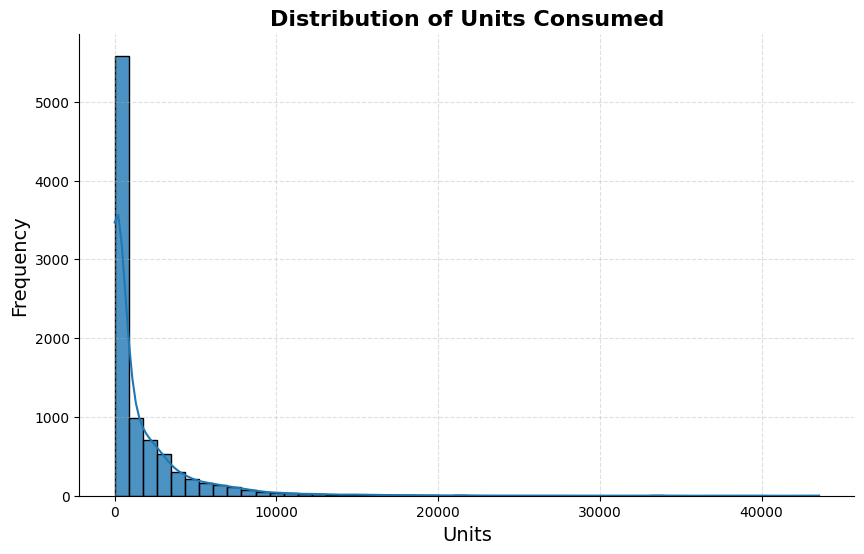

In [21]:
plt.figure(figsize=(10,6))

sns.histplot(
    data['units'],
    bins=50,
    kde=True,           # smooth density curve
    color="#1f77b4",    # a clean blue tone
    alpha=0.8
)

plt.title("Distribution of Units Consumed", fontsize=16, fontweight='bold')
plt.xlabel("Units", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)

sns.despine()  # removes top & right border for modern look
plt.show()

**Insights**
- There is a big range but,most of the points lies between 0 and 1000.
- It is right skewed with outlier.

**Distrabution of Load**

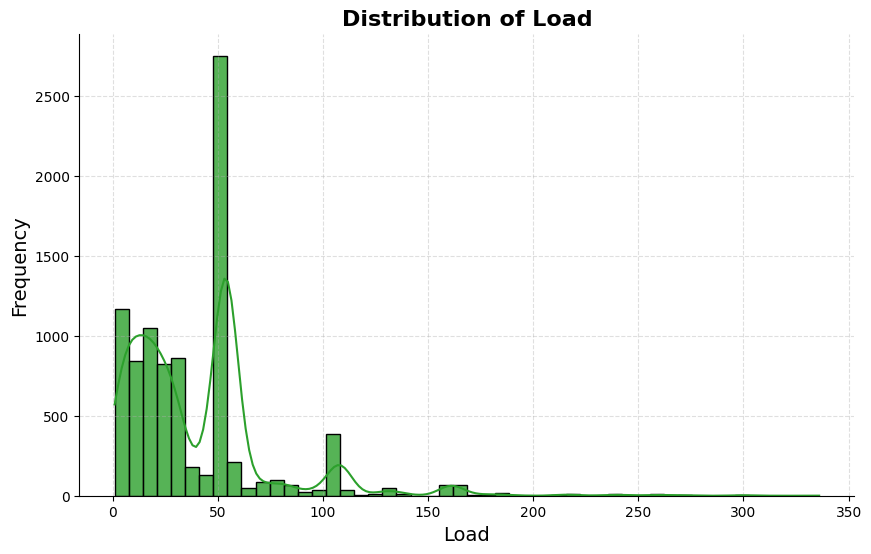

In [22]:
plt.figure(figsize=(10,6))

sns.histplot(
    data['load'],
    bins=50,
    kde=True,           # adds a smooth density curve
    color="#2ca02c",    # clean green tone
    alpha=0.8
)

plt.title("Distribution of Load", fontsize=16, fontweight='bold')
plt.xlabel("Load", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)

sns.despine()  # removes top & right border
plt.show()

- Also right skewed but typically less heavy-tailed than units (load is a connected capacity, not monthly consumption).

##### **Bivarient Analysis**

**Units Over Time**

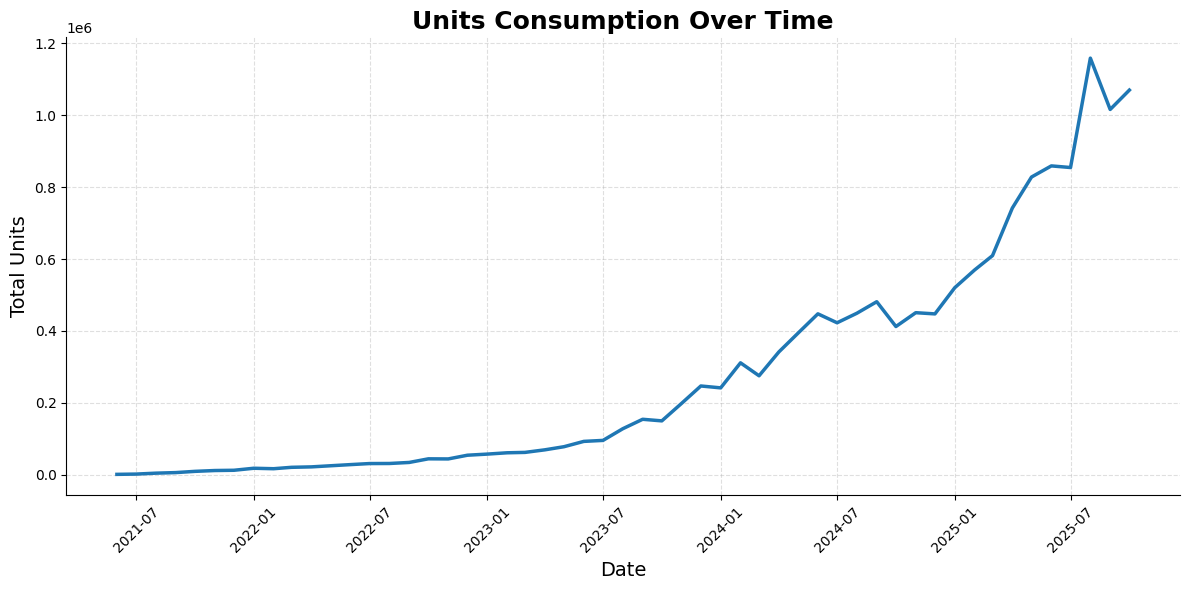

In [23]:

df_monthly = data.groupby('Date')['units'].sum()

plt.figure(figsize=(12,6))

sns.lineplot(
    x=df_monthly.index,
    y=df_monthly.values,
    linewidth=2.5,
    color="#1f77b4"   # nice blue tone
)

plt.title("Units Consumption Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Units", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
sns.despine()

plt.tight_layout()
plt.show()

**Insights**
- There is an increasing trend over time.It make sense right with the increse in electic vehicals over time the consumption increses.
- there are some irregularity(spikes) in the graph.


**Load Over Time**

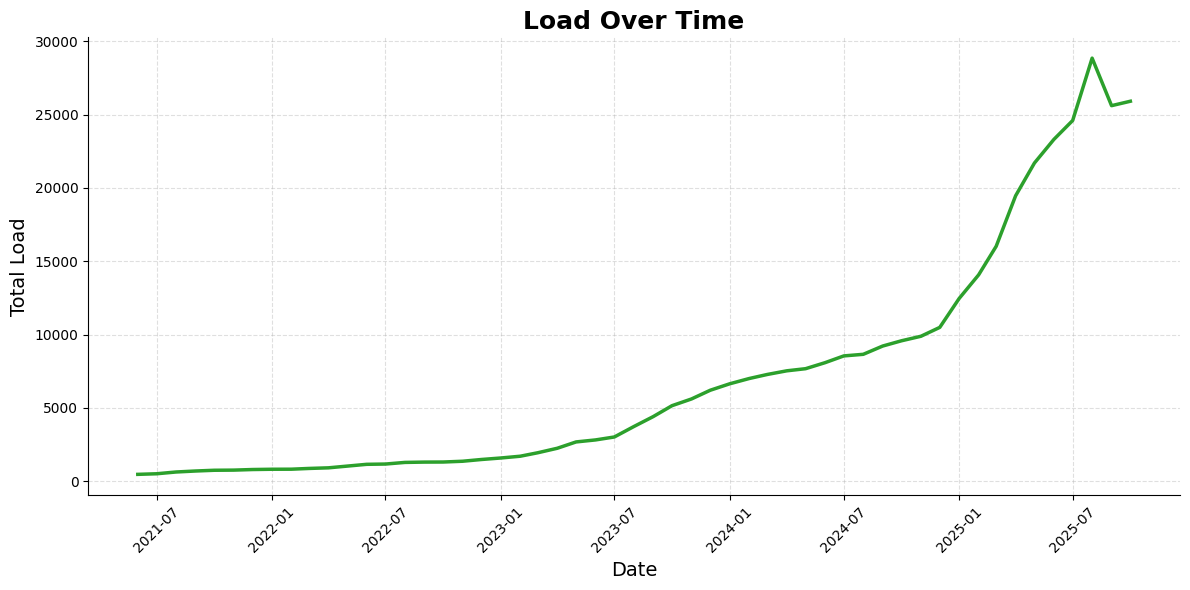

In [24]:
# Monthly aggregated load
df_monthly_load = data.groupby('Date')['load'].sum()

plt.figure(figsize=(12,6))

sns.lineplot(
    x=df_monthly_load.index,
    y=df_monthly_load.values,
    linewidth=2.5,
    color="#2ca02c"   # clean green tone
)

plt.title("Load Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Load", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
sns.despine()

plt.tight_layout()
plt.show()

**Insights**
- Even Load also increses over time and all though the measurement units of load and units consumption are different if we observe the graph of load is more similar to units consumption 
- It make sense also with increse in energy consumption the government need to increse power(load).

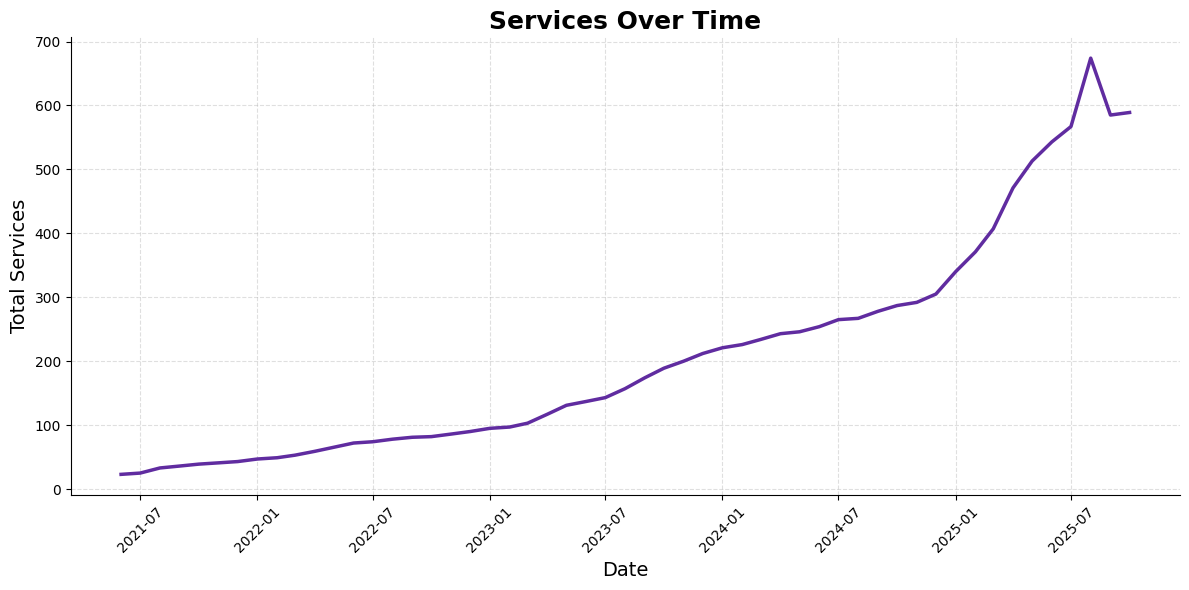

In [25]:
monthly_totservices = data.groupby('Date')['totservices'].sum()

plt.figure(figsize=(12,6))

sns.lineplot(
    x=monthly_totservices.index,
    y=monthly_totservices.values,
    linewidth=2.5,
    color="#602ca0"   # clean green tone
)

plt.title("Services Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Services", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
sns.despine()

plt.tight_layout()
plt.show()

- Now, we can see they are all correlated to each other because, with the increses in purchase of EV vehicals total services increses which leads more unitconsumptions which makes sense.
- there is a outlier in the every graph in the months between september 2025 we will investigate why that oulier.

**Top 10 Areas by Units Consumption**

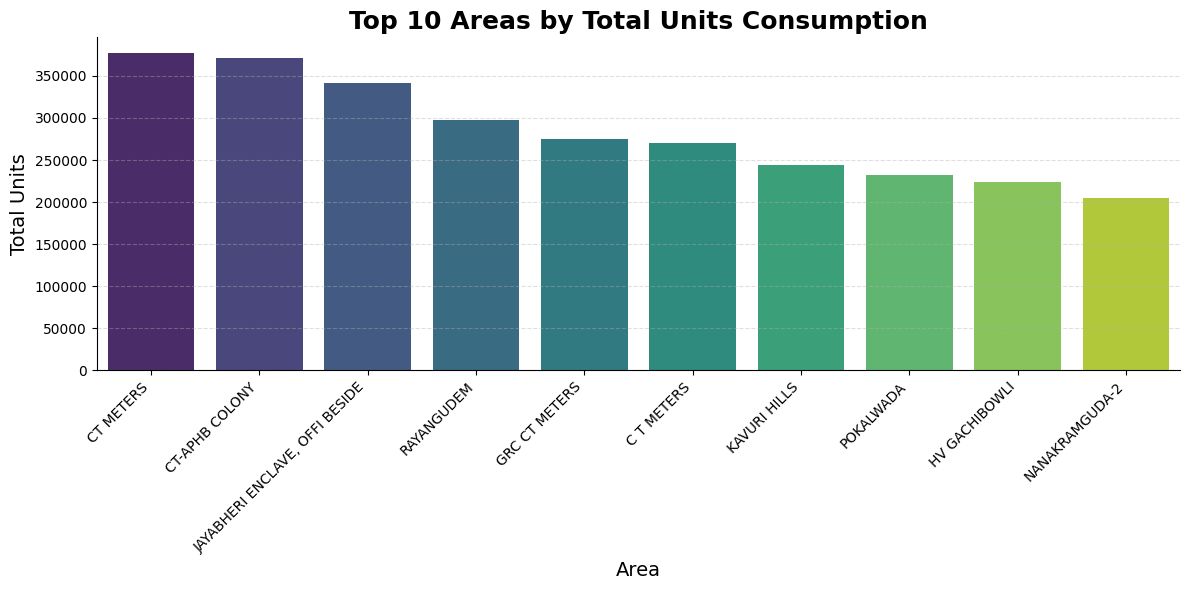

In [26]:
# Top 10 areas by consumption
area_units = data.groupby('area')['units'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))

colors = sns.color_palette("viridis", len(area_units))

sns.barplot(
    x=area_units.index,
    y=area_units.values,
    palette=colors  # beautiful gradient color palette
)


plt.title("Top 10 Areas by Total Units Consumption", fontsize=18, fontweight='bold')
plt.xlabel("Area", fontsize=14)
plt.ylabel("Total Units", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.4)

sns.despine()

plt.tight_layout()
plt.show()

**Top 10 Circles by Units Consumption**

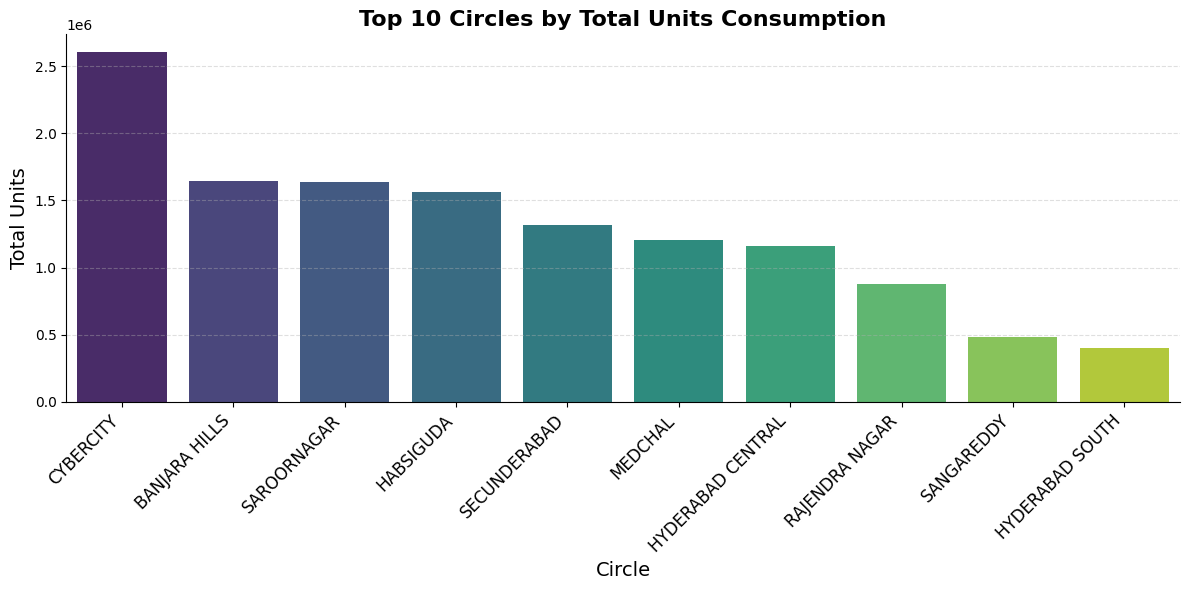

In [27]:
import matplotlib.pyplot as plt

circle_units = (
    data.groupby('circle')['units']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))

# Bar plot (no colors specified → default palette)
sns.barplot(
    x=circle_units.index,
    y=circle_units.values,
    palette='viridis'
)

# Title & labels with better typography
plt.title("Top 10 Circles by Total Units Consumption", fontsize=16, fontweight='bold')
plt.xlabel("Circle", fontsize=14)
plt.ylabel("Total Units", fontsize=14)

# Rotate labels & improve spacing
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()

plt.tight_layout()
plt.show()


**Top 10 Circles by Total Services**

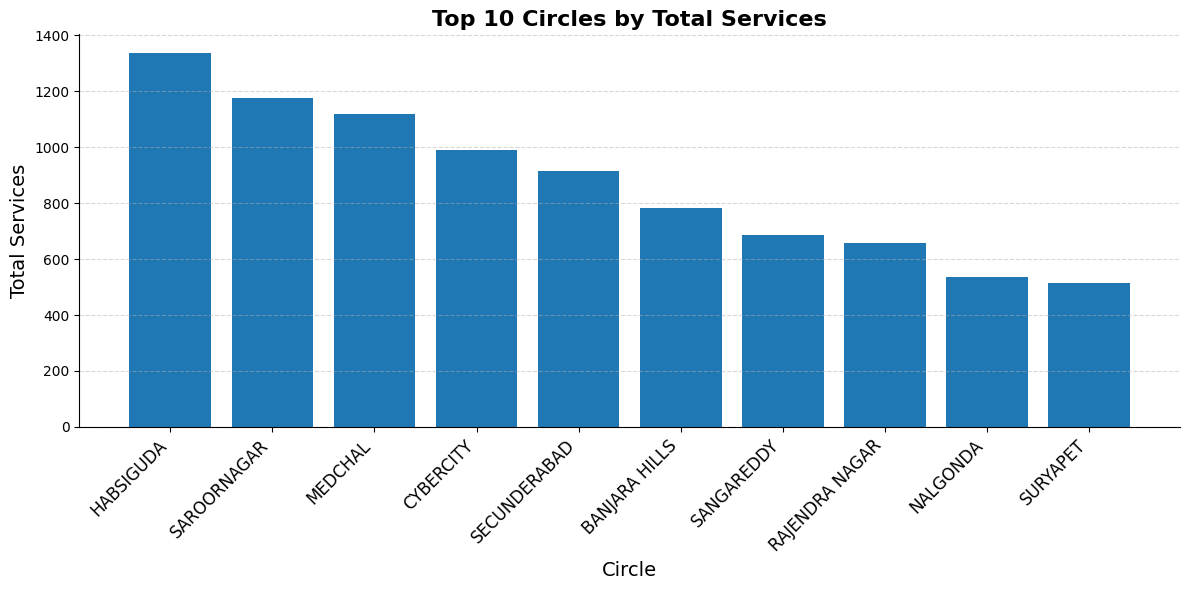

In [28]:
circle_totservices = (
    data.groupby('circle')['totservices']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))

# Simple, clean bar plot
plt.bar(circle_totservices.index, circle_totservices.values)

# Enhanced titles & labels
plt.title("Top 10 Circles by Total Services", fontsize=16, fontweight='bold')
plt.xlabel("Circle", fontsize=14)
plt.ylabel("Total Services", fontsize=14)

# Better rotated labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Subtle horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Clean look → remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


**Units vs Load Scatter Plot**

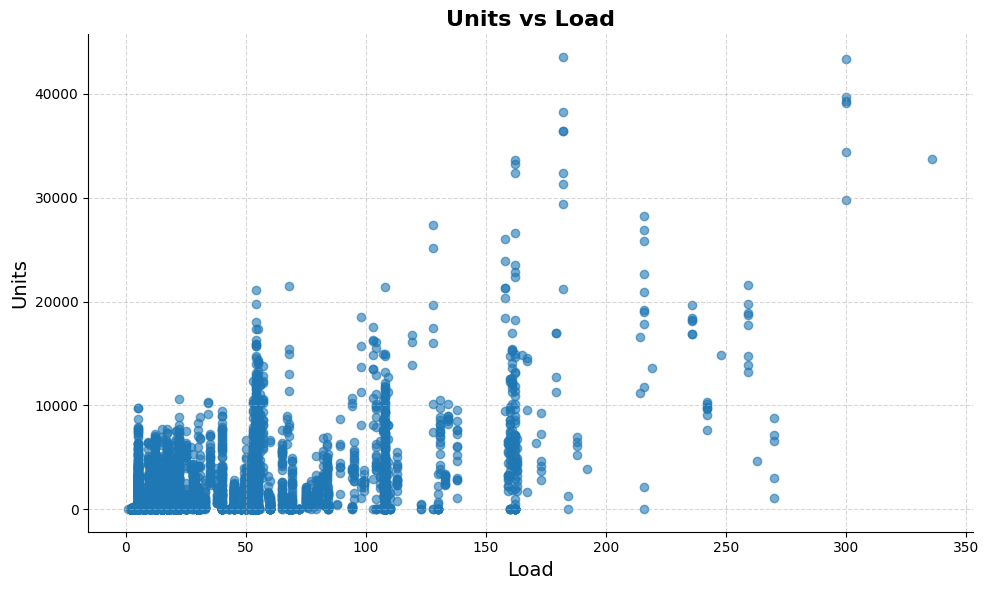

In [29]:
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(data['load'], data['units'], alpha=0.6)

# Titles and labels
plt.title("Units vs Load", fontsize=16, fontweight='bold')
plt.xlabel("Load", fontsize=14)
plt.ylabel("Units", fontsize=14)

# Grid for better readability
plt.grid(linestyle='--', alpha=0.5)

# Clean axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

##### **Multi-Varient Analysis**

**Correlation Heatmap**

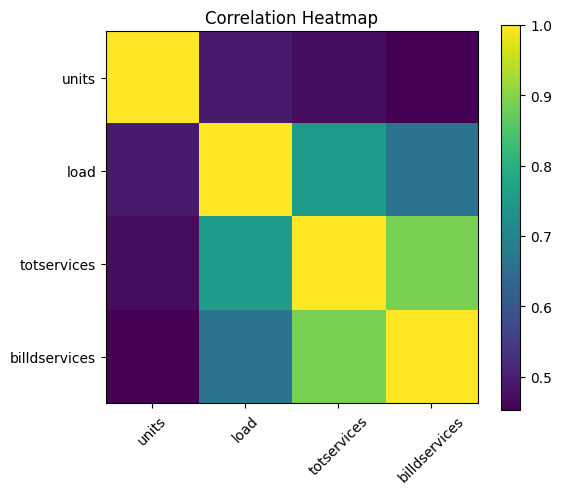

In [30]:
corr = data[['units', 'load', 'totservices', 'billdservices']].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

- Here it looks like we have less correlation but it is because we just gave values with doing some preprocessing.
- If we do find monthly sum and normalise or scale  the values of four variable have high corelation.
- I think they have high coreleation between them. 

## **Timeseries Analysis**

##### **Seasonal Decompostion**

In [31]:
##Preparing Data for applying seasonal Decompostion
df_monthly = data.groupby('Date')['units'].sum().reset_index()
df_monthly = df_monthly.set_index('Date') ##Setting Data as index 
ts = df_monthly['units']


In [32]:
##Pass argumnents to do seasonal decompostion
additive_result = seasonal_decompose(ts, model='additive', period=12)
multiplicative_result = seasonal_decompose(ts, model='multiplicative', period=12)

**Additive Model Plot**

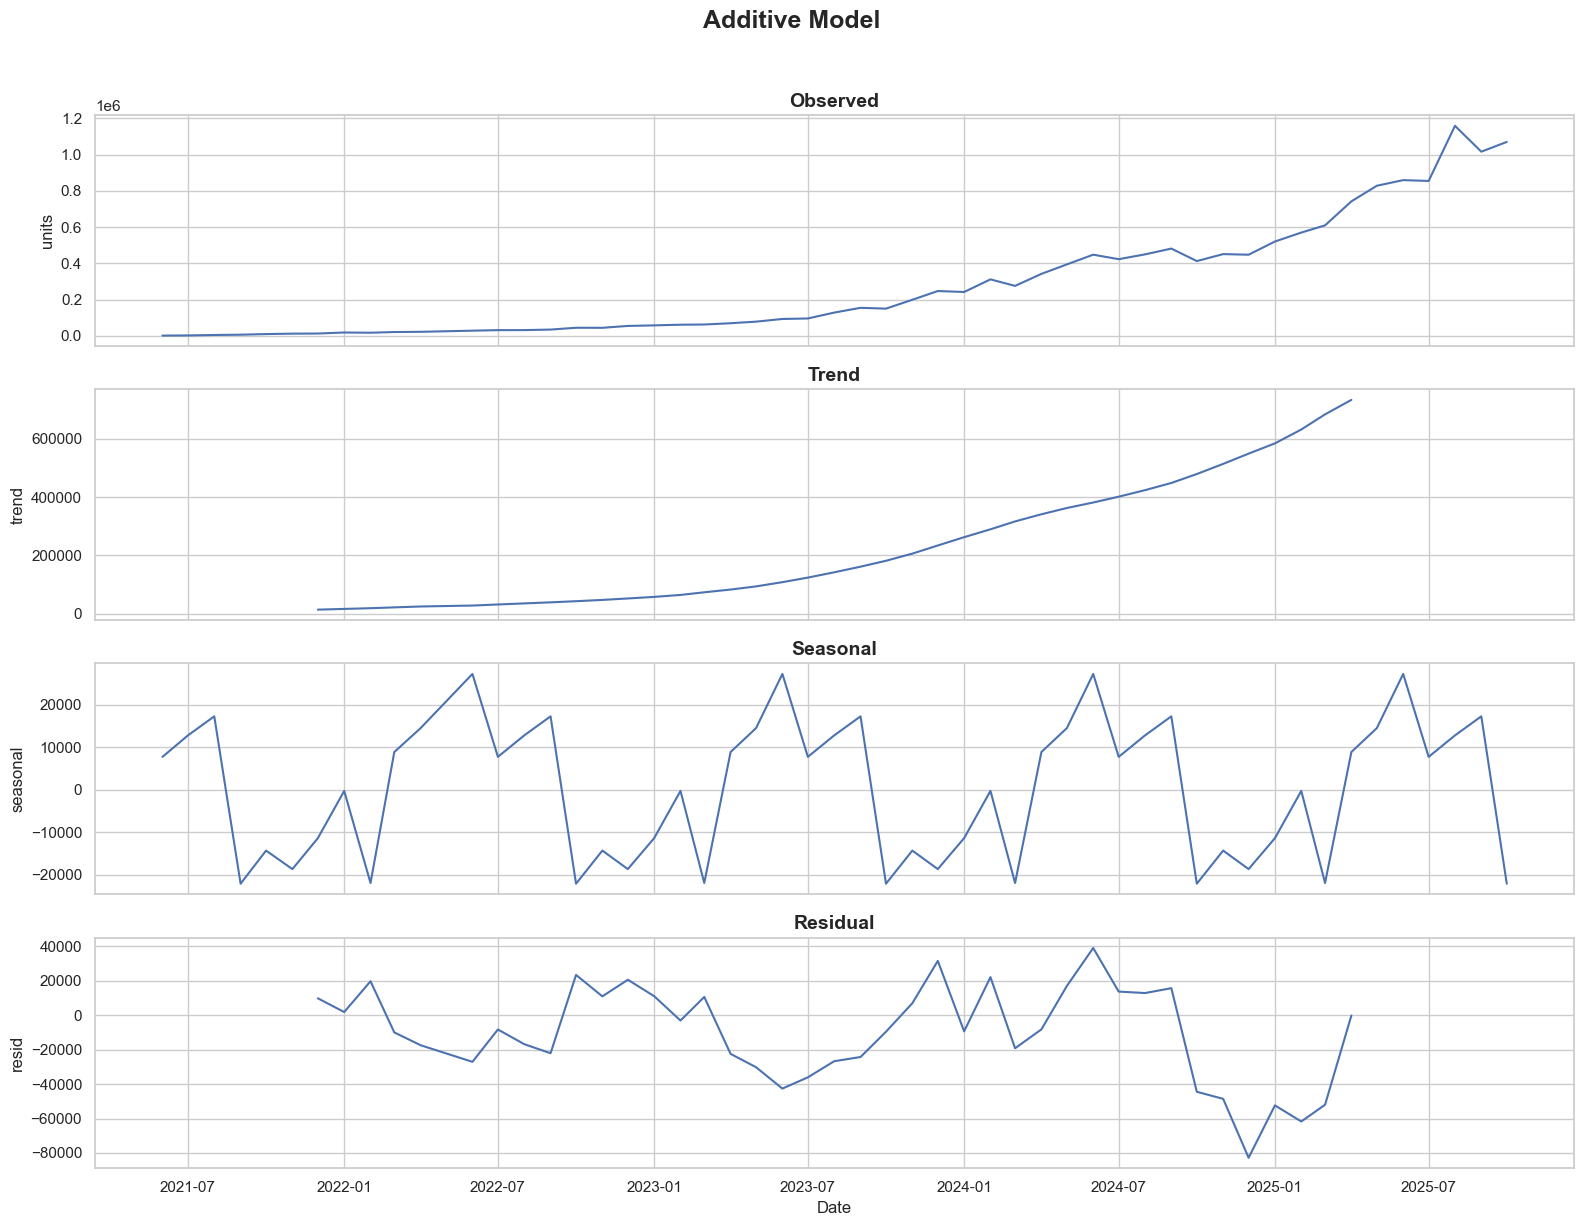

In [33]:
sns.set_theme(style="whitegrid")   # Aesthetic seaborn style

fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# 1. Observed
sns.lineplot(ax=axes[0], data=additive_result.observed)
axes[0].set_title("Observed", fontsize=14, fontweight="bold")

# 2. Trend
sns.lineplot(ax=axes[1], data=additive_result.trend)
axes[1].set_title("Trend", fontsize=14, fontweight="bold")

# 3. Seasonal
sns.lineplot(ax=axes[2], data=additive_result.seasonal)
axes[2].set_title("Seasonal", fontsize=14, fontweight="bold")

# 4. Residual
sns.lineplot(ax=axes[3], data=additive_result.resid)
axes[3].set_title("Residual", fontsize=14, fontweight="bold")

fig.suptitle("Additive Model", fontsize=18, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


**Trend Component - EV charging Demand is Growing Fast:**
- Trend looks strong exponential growth.
- Trend line is strongly upward from mid-2021 to late-2025.
- The growth becomes faster after mid-2023.
- Around 2024–2025 the slope is even steeper indicating rapid EV adoption, more charging stations therefore, higher usage.

**Seasonality — Clear Monthly Pattern**
- between the months April and July(usually summer) the cunsumption is more because of more traveling.
- Certain months especially winter/monsoon peaks less consumption especially due to less travel.
- but we can suspect in original observation, we didn't see any seasonality.

**Residual — No Major Red Flags**
- Randomly scattered
- No obvious trend
- No strong autocorrelation shape
- but there are some unusual(outliers) spikes can be many reasons like holidays, inaqurate data.

**Multiplicative Model Plot**

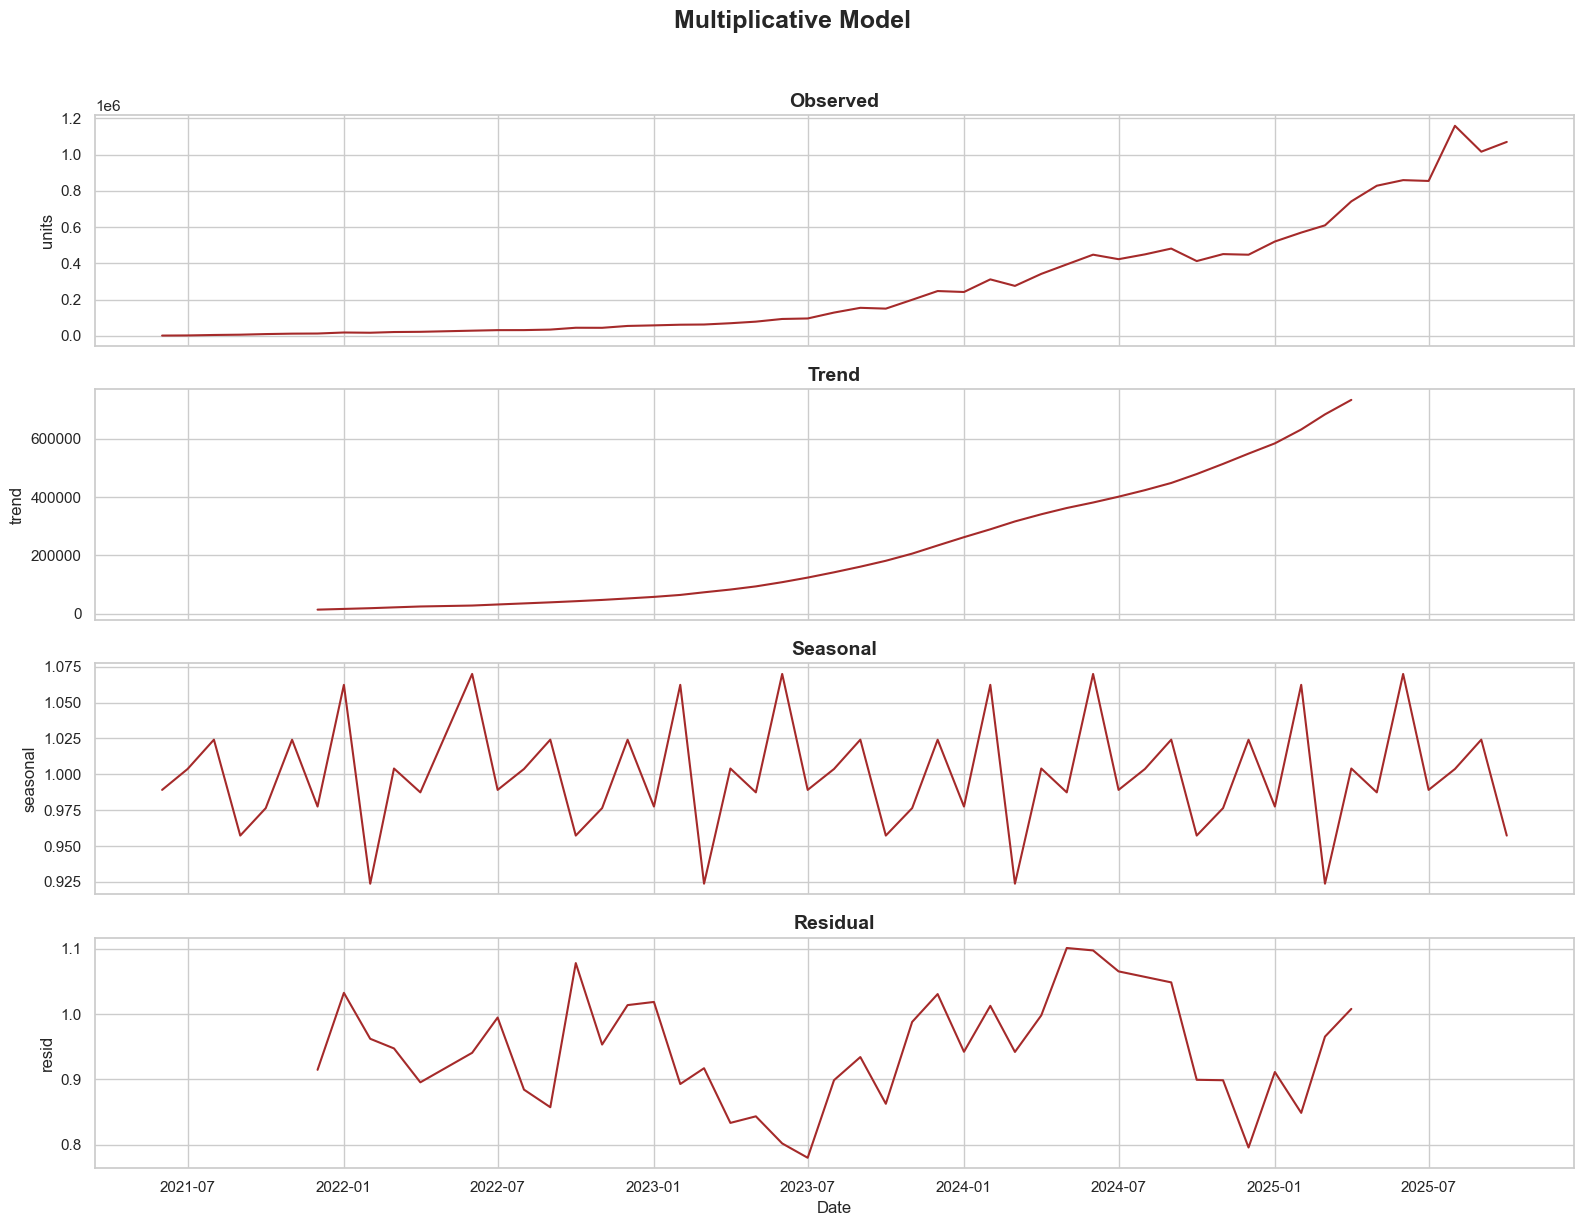

In [34]:
sns.set_theme(style="whitegrid")   # Aesthetic seaborn style

fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# 1. Observed
sns.lineplot(ax=axes[0], data=multiplicative_result.observed, color='brown')
axes[0].set_title("Observed", fontsize=14, fontweight="bold")

# 2. Trend
sns.lineplot(ax=axes[1], data=multiplicative_result.trend, color='brown')
axes[1].set_title("Trend", fontsize=14, fontweight="bold")

# 3. Seasonal
sns.lineplot(ax=axes[2], data=multiplicative_result.seasonal, color='brown')
axes[2].set_title("Seasonal", fontsize=14, fontweight="bold")

# 4. Residual
sns.lineplot(ax=axes[3], data=multiplicative_result.resid, color='brown')
axes[3].set_title("Residual", fontsize=14, fontweight="bold")

fig.suptitle("Multiplicative Model", fontsize=18, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

**Which Model Fits Data?**
- units consumption grew form 20,000 to 1,000,000+
- that is a 50x growth
- But seasonal variation stays around 10–20k, not growing proportionally.

##### **STL Decompostion**

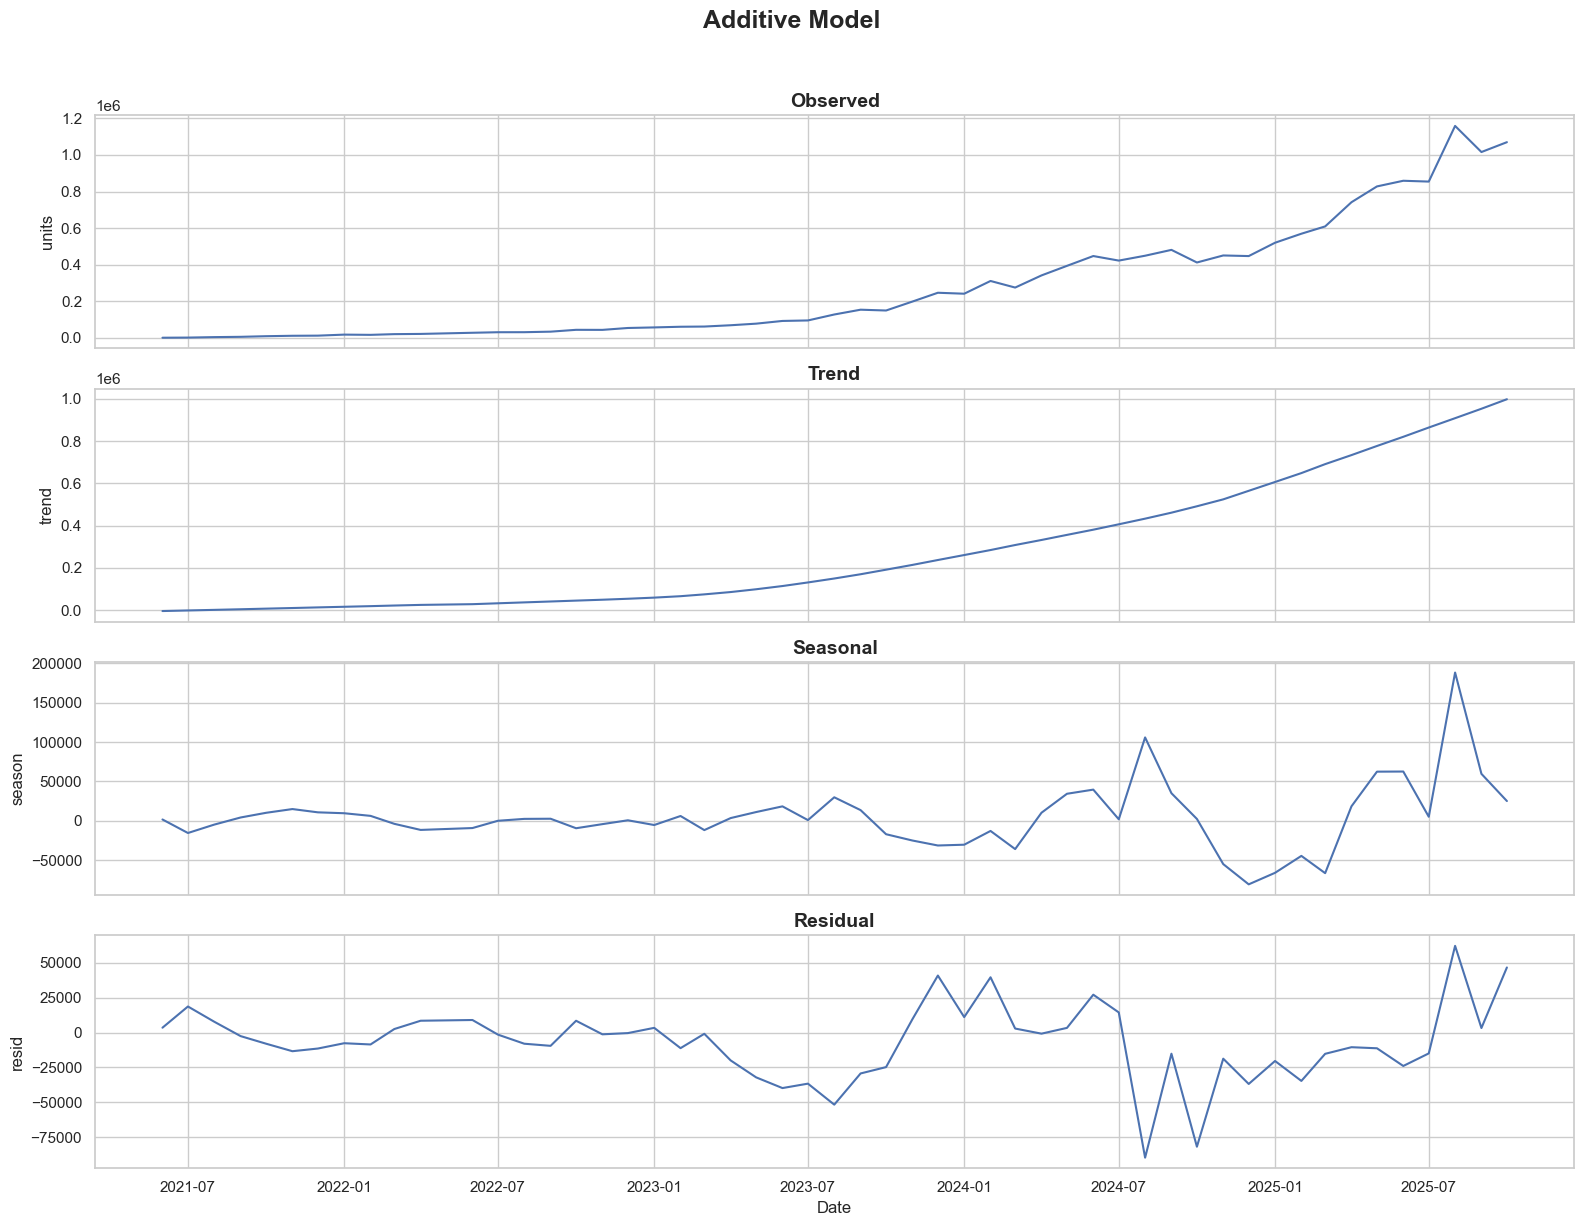

In [35]:
from statsmodels.tsa.seasonal import STL

stl= STL(ts, period=12)
stl_result = stl.fit()

sns.set_theme(style="whitegrid")   # Aesthetic seaborn style

fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# 1. Observed
sns.lineplot(ax=axes[0], data=stl_result.observed)
axes[0].set_title("Observed", fontsize=14, fontweight="bold")

# 2. Trend
sns.lineplot(ax=axes[1], data=stl_result.trend)
axes[1].set_title("Trend", fontsize=14, fontweight="bold")

# 3. Seasonal
sns.lineplot(ax=axes[2], data=stl_result.seasonal)
axes[2].set_title("Seasonal", fontsize=14, fontweight="bold")

# 4. Residual
sns.lineplot(ax=axes[3], data=stl_result.resid)
axes[3].set_title("Residual", fontsize=14, fontweight="bold")

fig.suptitle("Additive Model", fontsize=18, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


**why Seasonal decompostion shows seasonality but STL does not?**

- seasonal decompostion assumes seasonality is present, perfectly periodic and repeats every year with the same shape and amplitude even if data has weak seasonality
- but we can easily infer from observed graph that it has no seasonality.


**Check Auto coorelation**

In [36]:
from statsmodels.tsa.stattools import acf

acf_values = acf(ts, nlags=12)
print("Auto corelation of 12 months lag: ",acf_values[12])


Auto corelation of 12 months lag:  0.27058523347765967


- Auto corelation is very less there is less corelation between present year month and previous year same month.

Text(0.5, 1.0, 'PACF Plot')

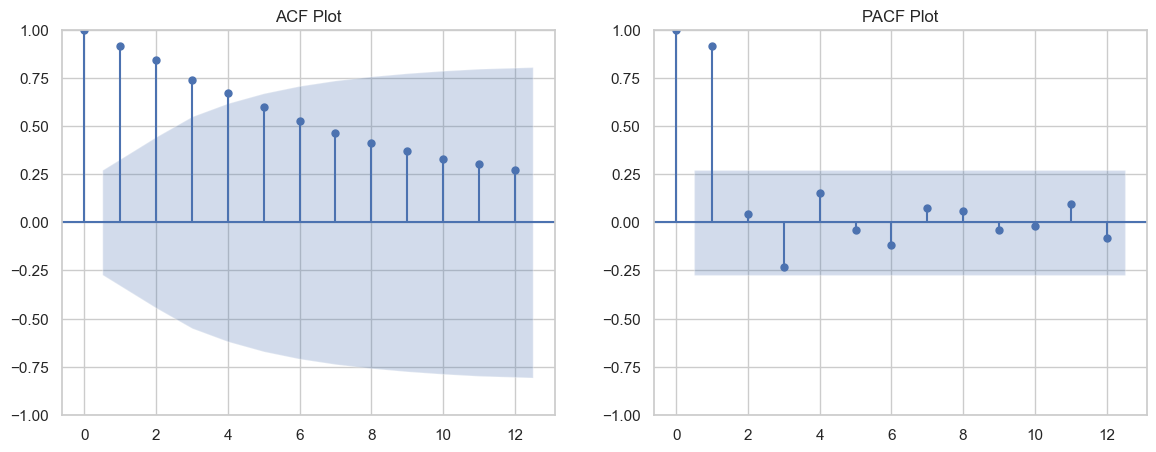

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14,5))

##ACF Plot
plt.subplot(1, 2, 1)
plot_acf(ts, ax=plt.gca(), lags=12)
plt.title("ACF Plot")

plt.subplot(1, 2, 2)
plot_pacf(ts, ax=plt.gca(), lags=12,method='ywm')
plt.title("PACF Plot")

##### **Check for Stationarity**

In [38]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ts)

print("p-values of ADF test is:" , adf_test[1])

p-values of ADF test is: 1.0


- The p-value of 1.0 is much higher than the common significance levels (0.05 or 0.01), which suggests that there is not enough evidence to reject the null hypothesis.

- Based on this result, we cannot reject the null hypothesis of non-stationarity.
- This suggests that the time series is likely non-stationary, and it may exhibit trends, seasonality, or other patterns over time(as we observed befor with decompostion)
- This should be addressed through differencing, transformation, or seasonal adjustment before applying many time series forecasting methods.

**Differencing**

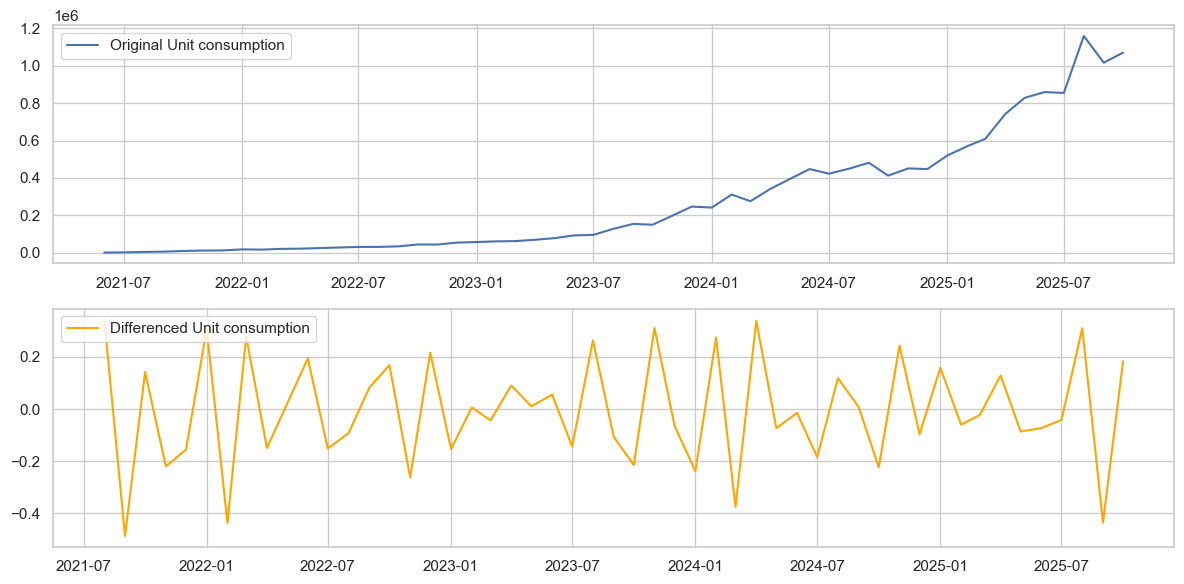

In [39]:
#Differencing 
ts_log = np.log(ts) ##Applying Log transformation
ts_diff = ts_log.diff().diff().dropna() ##second order differencing
##seasonality differencing

##Plot Original data vs satatinoary data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(ts, label='Original Unit consumption')
plt.legend(loc='upper left')
plt.subplot(2, 1, 2)
plt.plot(ts_diff, label='Differenced Unit consumption', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Why Just Differencing was not enough?**
- Trend is extremely strong

- Growth accelerates over the years

- Variance increases over time

This is normal — EV adoption grows exponentially, so simple differencing (1) or seasonal differencing (12) isn’t enough alone.

In [40]:
adf_diff_test = adfuller(ts_diff)
print("p-values of ADF test is:" , adf_diff_test[1])
print(adf_diff_test[1] < 0.05)


p-values of ADF test is: 6.669052469371959e-07
True


- Now time series is stationary because, p-value less then 0.05.so, we reject the null hypothasis.
- the transformed series is good for ARIMA modeling as there is no strong seasonality.

##### **Plot ACF and PCF**

Text(0.5, 1.0, 'PACF of TS')

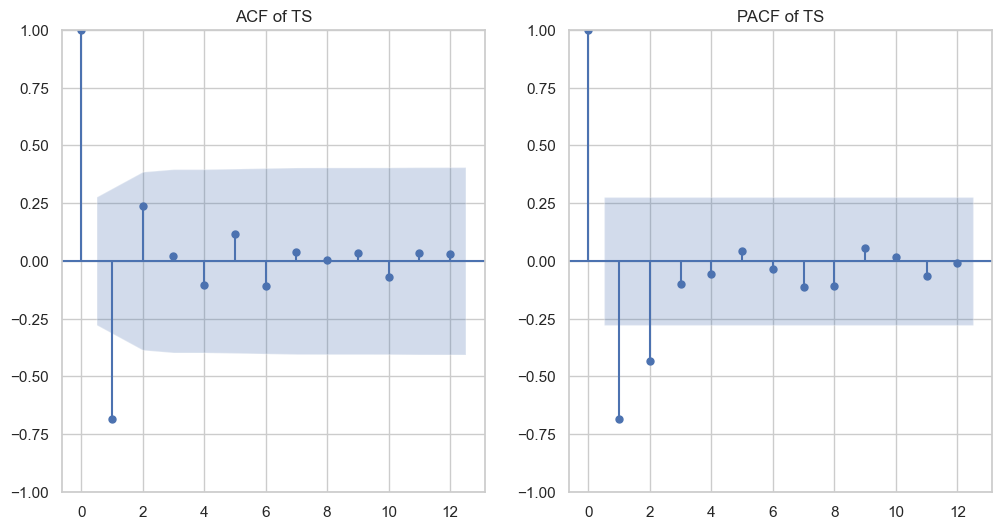

In [41]:

plt.figure(figsize=(12,6))
##ACF Plot
plt.subplot(1, 2, 1)
plot_acf(ts_diff, ax=plt.gca(), lags=12)
plt.title("ACF of TS")

plt.subplot(1, 2, 2)
plot_pacf(ts_diff, ax=plt.gca(), lags=12,method='ywm')
plt.title("PACF of TS")

**Analysis of ACF Pattern**
- Lag 1: OUTSIDE blue region (significant negative spike ~-0.70)
- Lag 2: INSIDE blue region (~0.25) - NOT significant
- All other lags: Inside blue region (not significant)
- Sharp cut-off after lag 1 → suggests MA(1) component

**Analysis of PACF Pattern**

- Lag 1: OUTSIDE blue region (significant negative spike ~-0.70)
- Lag 2: OUTSIDE blue region (significant negative spike ~-0.50) 
- All other lags: Inside blue region (not significant)
- Sharp cut-off after lag 2 → suggests AR(2) component

#### **Building Predictive Models**

**Split the dataset**

In [42]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Your log-transformed data
# log_data = np.log(original_data)

# Split: 80% train, 20% test (common split)
train_size = int(len(ts_log) * 0.9)
train_data = ts_log[:train_size]
test_data = ts_log[train_size:]

print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")
print(f"Test period: {test_data.index[0]} to {test_data.index[-1]}")

Train size: 46
Test size: 6
Test period: 2025-05-01 00:00:00 to 2025-10-01 00:00:00


**Models**

In [43]:
# Models to compare
models_to_try = [
    (2, 2, 1),  # Primary recommendation
    (1, 2, 1),  # Simpler alternative
    (2, 2, 0),  # Pure AR
    (0, 2, 1),  # Pure MA
]

results = {}

for order in models_to_try:
    try:
        # Fit on TRAINING data only
        model = ARIMA(train_data, order=order)
        fitted_model = model.fit()
        
        # Forecast for test period
        forecast = fitted_model.forecast(steps=len(test_data))
        
        # Calculate error metrics (on log scale)
        mse = mean_squared_error(test_data, forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_data, forecast)
        
        # Transform back to original scale for interpretation
        forecast_original = np.exp(forecast)
        test_original = np.exp(test_data)
        mse_original = mean_squared_error(test_original, forecast_original)
        rmse_original = np.sqrt(mse_original)
        
        
        results[order] = {
            'model': fitted_model,
            'AIC': fitted_model.aic,
            'BIC': fitted_model.bic,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MSE_original': mse_original,
            'RMSE_original': rmse_original,
            'forecast': forecast
        }
        
        print(f"\nARIMA{order}:")
        print(f"  AIC: {fitted_model.aic:.2f}")
        print(f"  BIC: {fitted_model.bic:.2f}")
        print(f"  RMSE (log): {rmse:.4f}")
        print(f"  RMSE (original): {rmse_original:.2f}")
        
        
    except Exception as e:
        print(f"\nARIMA{order} - Failed: {str(e)}")


ARIMA(2, 2, 1):
  AIC: -40.77
  BIC: -33.64
  RMSE (log): 0.2094
  RMSE (original): 249467.66

ARIMA(1, 2, 1):
  AIC: -40.45
  BIC: -35.10
  RMSE (log): 0.2098
  RMSE (original): 250447.62

ARIMA(2, 2, 0):
  AIC: -42.57
  BIC: -37.22
  RMSE (log): 0.2084
  RMSE (original): 248329.40

ARIMA(0, 2, 1):
  AIC: -35.16
  BIC: -31.59
  RMSE (log): 0.1516
  RMSE (original): 171011.59


**Find best model by different criteria**

In [44]:
# Find best model by different criteria
best_by_aic = min(results.keys(), key=lambda x: results[x]['AIC'])
best_by_bic = min(results.keys(), key=lambda x: results[x]['BIC'])
best_by_rmse = min(results.keys(), key=lambda x: results[x]['RMSE'])


print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print(f"Best by AIC:  ARIMA{best_by_aic}")
print(f"Best by BIC:  ARIMA{best_by_bic}")
print(f"Best by RMSE: ARIMA{best_by_rmse}")



MODEL COMPARISON SUMMARY
Best by AIC:  ARIMA(2, 2, 0)
Best by BIC:  ARIMA(2, 2, 0)
Best by RMSE: ARIMA(0, 2, 1)


**Plot actual vs predicted for all models**

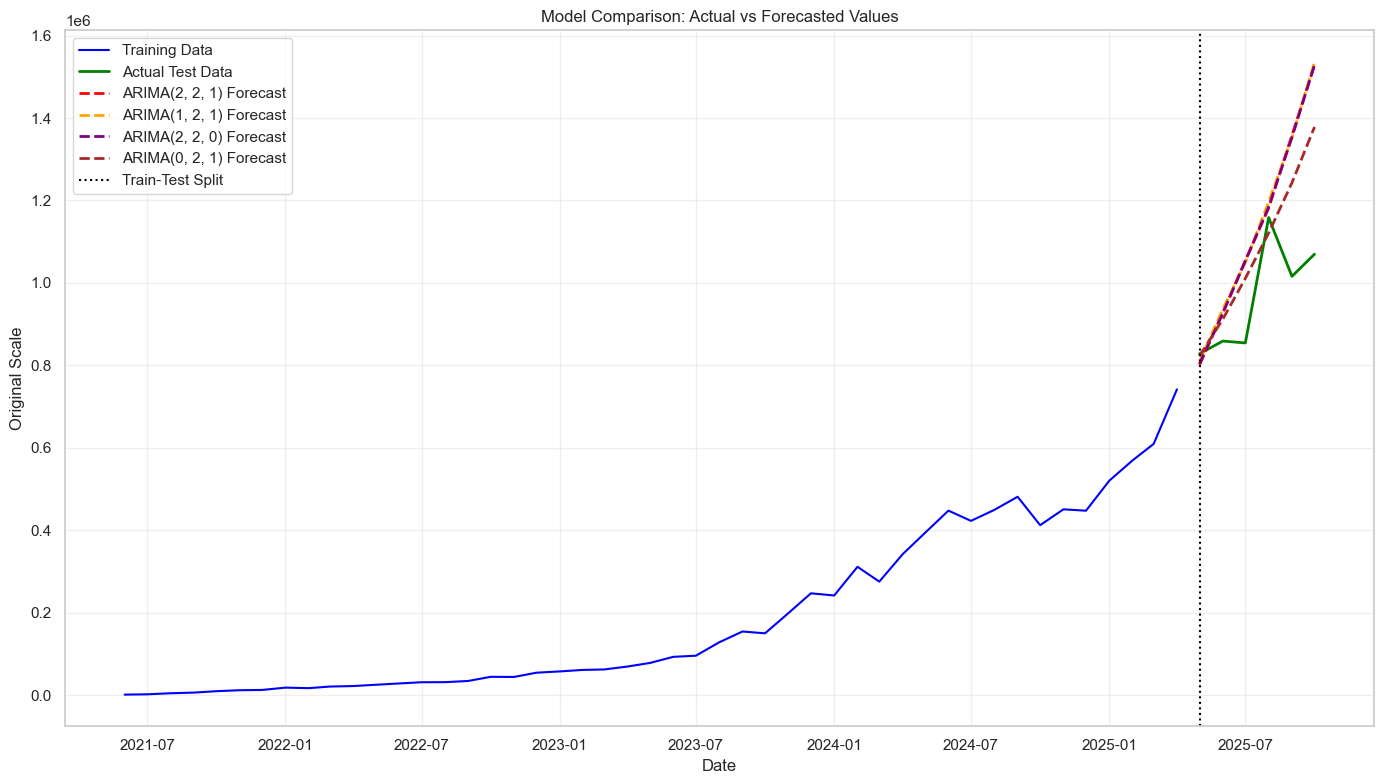

In [45]:

plt.figure(figsize=(14, 8))

# Plot training and test data (original scale)
train_original = np.exp(train_data)
test_original = np.exp(test_data)

plt.plot(train_original.index, train_original, label='Training Data', color='blue')
plt.plot(test_original.index, test_original, label='Actual Test Data', color='green', linewidth=2)

# Plot forecasts from each model
colors = ['red', 'orange', 'purple', 'brown']
for (order, color) in zip(results.keys(), colors):
    forecast_original = np.exp(results[order]['forecast'])
    plt.plot(test_original.index, forecast_original, 
             label=f'ARIMA{order} Forecast', 
             linestyle='--', color=color, linewidth=2)

plt.axvline(x=test_data.index[0], color='black', linestyle=':', label='Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Original Scale')
plt.title('Model Comparison: Actual vs Forecasted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Create comparison table
comparison = []
for order in results.keys():
    comparison.append({
        'Model': f'ARIMA{order}',
        'AIC': results[order]['AIC'],
        'BIC': results[order]['BIC'],
        'RMSE': results[order]['RMSE_original']
        
    })

comparison_df = pd.DataFrame(comparison)
comparison_df = comparison_df.sort_values('RMSE')
print("\n" + "="*70)
print("DETAILED MODEL COMPARISON (sorted by RMSE)")
print("="*70)
print(comparison_df.to_string(index=False))


DETAILED MODEL COMPARISON (sorted by RMSE)
         Model        AIC        BIC          RMSE
ARIMA(0, 2, 1) -35.161841 -31.593462 171011.588868
ARIMA(2, 2, 0) -42.574295 -37.221727 248329.400271
ARIMA(2, 2, 1) -40.774928 -33.638169 249467.657151
ARIMA(1, 2, 1) -40.453109 -35.100540 250447.623837


- From Above ARIMA(0, 2, 1) is best Model. which, is simple Moving average Model with lag=1.